# 直通车投产设置分析
Jiakang Huang 
2024.1.16

In [53]:
# Use the library function to load the R packages
library(tidyverse)
library(repr)
library(readxl)
library(RColorBrewer)
library(tidymodels)

表格内容分析：
- 产品成本: 单个产品的成本。
- 快递费: 单个产品的快递费用。
- 总计: 产品成本和快递费用的总和。
- 定价: 产品的销售价格。
- 产品毛利: 销售后的毛利率。
- 固定10%费用: 销售价格的10%作为固定费用。
- 实际产品毛利: 扣除固定费用后的毛利率。
- 理论投产: 理论上的投产数量。
- 付费损耗20%: 假设20%的付费损耗。
- 保底投产: 在损耗后的最低保底投产数量。
- 投入花费: 总的投资成本。
- 实际产出销售额: 实际的销售总额。
- 退款后金额: 假设有退款后的实际销售金额。
- 投入产出毛利: 投资与收益之间的毛利。
- 实际产出毛利: 实际销售后的毛利。
- 实际利润率: 最终的利润率。

In [54]:
# 读取CSV文件
data <- read.csv("副本直通车投产设置分析.csv", header = TRUE)
head(data)

par(family = "STSong")

,产品成本,快递费,总计,定价,产品毛利,固定10.费用,实际产品毛利,理论投产,付费损耗20.,保底投产,投入花费,实际产出销售额,退款后金额,投入产出毛利,实际产出毛利,实际利润率
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,10,2.5,12.5,17.9,30.17%,10.00%,20.17%,4.96,0.8,6.2,1000,6198.061,4958.4,1495.8,495.8,10.00%
2,NA,NA,12.5,17.9,30.17%,10.00%,20.17%,4.96,0.8,6.1,1000,6100.000,4880.0,1472.2,472.2,9.68%
3,NA,NA,12.5,17.9,30.17%,10.00%,20.17%,4.96,0.8,6.0,1000,6000.000,4800.0,1448.0,448.0,9.33%
4,NA,NA,12.5,17.9,30.17%,10.00%,20.17%,4.96,0.8,5.9,1000,5900.000,4720.0,1423.9,423.9,8.98%
5,NA,NA,12.5,17.9,30.17%,10.00%,20.17%,4.96,0.8,5.8,1000,5800.000,4640.0,1399.8,399.8,8.62%
6,NA,NA,12.5,17.9,30.17%,10.00%,20.17%,4.96,0.8,5.2,1000,5200.000,4160.0,1255.0,255.0,6.13%


In [55]:
# 筛选数据
data_15 <- data |>
    filter(`产品成本` == 15) |>
    select(`产品成本`, `保底投产`, `实际利润率`)

data_9 <- data |>
    filter(`产品成本` == 9) |>
    select(`产品成本`, `保底投产`, `实际利润率`)

#单位换算
data_15$实际利润率 <- as.numeric(sub("%", "", data_15$实际利润率)) / 100
data_9$实际利润率 <- as.numeric(sub("%", "", data_9$实际利润率)) / 100
data_15 <- na.omit(data_15)
data_9 <- na.omit(data_9)

head(data_15)
head(data_9)

,产品成本,保底投产,实际利润率
,<int>,<dbl>,<dbl>
1,15,13.6,0.1000
2,15,13.7,0.1009
3,15,13.8,0.1016
4,15,13.9,0.1022
5,15,14.6,0.1065
6,15,13.5,0.0995


,产品成本,保底投产,实际利润率
,<int>,<dbl>,<dbl>
1,9,4.2,0.1000
2,9,4.1,0.0921
3,9,4.0,0.0845
4,9,3.9,0.0765
5,9,3.7,0.0591
6,9,4.3,0.1063


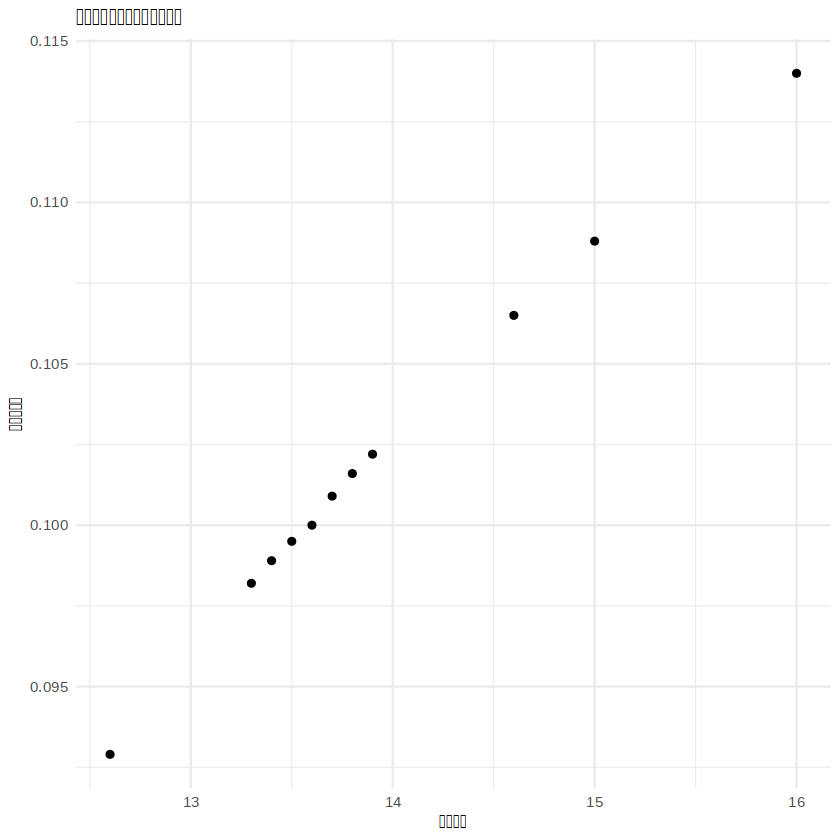

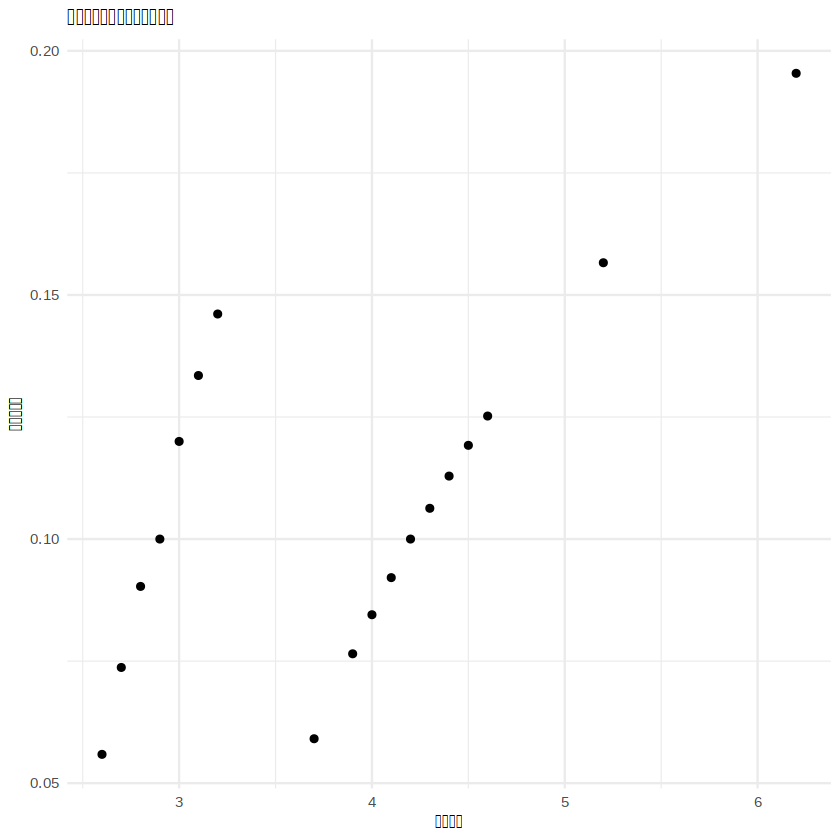

In [56]:
#制作图表
par(family = "STSong")
graph_15 <- ggplot(data_15, aes(x = `保底投产`, y = `实际利润率`)) +
    geom_point() +
    theme_minimal() +
    labs(title = "保底投产与实际利润率的关系",
         x = "保底投产",
         y = "实际利润率")

graph_15

graph_9 <- ggplot(data_9, aes(x = `保底投产`, y = `实际利润率`)) +
    geom_point() +
    theme_minimal() +
    labs(title = "保底投产与实际利润率的关系",
         x = "保底投产",
         y = "实际利润率")

graph_9

In [57]:
# 线性回归模型
model_15 <- lm(`实际利润率` ~ `保底投产`, data = data_15)

# 查看模型摘要以获取公式
summary(model_15)


Call:
lm(formula = 实际利润率 ~ 保底投产, data = data_15)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.843e-04  2.420e-06  1.091e-04  3.058e-04  3.558e-04 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0166044  0.0022411   7.409 4.06e-05 ***
保底投产    0.0061333  0.0001604  38.243 2.84e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004727 on 9 degrees of freedom
Multiple R-squared:  0.9939,	Adjusted R-squared:  0.9932 
F-statistic:  1462 on 1 and 9 DF,  p-value: 2.838e-11


In [58]:
# 线性回归模型
model_9 <- lm(`实际利润率` ~ `保底投产`, data = data_9)

# 查看模型摘要以获取公式
summary(model_9)


Call:
lm(formula = 实际利润率 ~ 保底投产, data = data_9)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045457 -0.020390 -0.005775  0.016327  0.053201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.018291   0.028237   0.648  0.52633   
保底投产    0.023315   0.007118   3.275  0.00476 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02817 on 16 degrees of freedom
Multiple R-squared:  0.4014,	Adjusted R-squared:  0.364 
F-statistic: 10.73 on 1 and 16 DF,  p-value: 0.00476


### 总结报告

#### 回归分析概览：
- **模型**：线性回归模型使用“保底投产”来预测“实际利润率”。
- **数据集**：分析基于产品成本为15的商品数据。

#### 回归结果：
- **截距（Intercept）**：截距项的估计值为0.0001660。这意味着当“保底投产”为0时，预测的“实际利润率”是0.0001660。
- **斜率（保底投产）**：斜率的估计值为0.00006133。这表明“保底投产”每增加一个单位，预测的“实际利润率”平均增加0.00006133单位。
- **标准误差**：截距的标准误差为0.00002241，斜率的标准误差为0.000001604。较小的标准误差表明估计值的精确度较高。
- **t值**：截距的t值为7.409，斜率的t值为38.243。这些高t值表明，截距和斜率与0相比是非常显著不同的。
- **P值**：截距和斜率的P值非常小（截距为4.06e-05，斜率为2.84e-11），这强烈表明“保底投产”是一个显著的预测变量。
- **残差标准误差**：为4.727e-06，这表示模型对数据拟合得很好。
- **决定系数（R-squared）**：为0.9939，调整后的R-squared为0.9932，表明模型解释了数据中几乎所有的变异性。

#### 结论：
此线性回归模型显示，产品成本为15的商品中，“保底投产”和“实际利润率”之间存在强烈的线性关系。模型的统计显著性非常高，决定系数表明几乎所有的变异性都被模型解释了。这表明“保底投产”是预测“实际利润率”的一个非常有效的指标。


### 总结报告

#### 针对产品成本为9的商品

#### 回归分析概览：
- **模型**：线性回归模型使用“保底投产”来预测“实际利润率”。
- **数据集**：分析基于产品成本为9的商品数据。

#### 回归结果：
- **截距（Intercept）**：截距项的估计值为0.018291。这意味着当“保底投产”为0时，预测的“实际利润率”是0.018291。
- **斜率（保底投产）**：斜率的估计值为0.023315。这表明“保底投产”每增加一个单位，预测的“实际利润率”平均增加0.023315单位。
- **标准误差**：截距的标准误差为0.028237，斜率的标准误差为0.007118。这些值表示估计的精确度。
- **t值**：截距的t值为0.648，斜率的t值为3.275。斜率的较高t值表明它与0显著不同。
- **P值**：截距的P值为0.52633，斜率的P值为0.00476，表示“保底投产”是一个显著的预测变量。
- **残差标准误差**：为0.02817，表示模型的预测误差大小。
- **决定系数（R-squared）**：为0.4014，调整后的R-squared为0.364，表明模型能够解释约40.14%的变异性。

#### 结论：
此线性回归模型表明，在产品成本为9的商品中，“保底投产”和“实际利润率”之间存在中等程度的线性关系。虽然模型统计上显著，但R-squared值表明还有许多其他因素可能影响“实际利润率”，这些因素未被当前模型捕获。
